In [22]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [24]:
# Function to validate and convert date input
def get_valid_date():
    while True:
        date_str = input("Enter the date you bought gold (YYYY-MM-DD): ")
        try:
            date = datetime.strptime(date_str, "%Y-%m-%d")
            return date
        except ValueError:
            print("Invalid date format. Please enter the date in YYYY-MM-DD format.")


In [26]:
# Function to download gold data for a specific date
def get_gold_data(purchase_date):
    ticker = "GC=F"  # Gold Futures Ticker
    try:
        # Fetch historical data for gold asset
        data = yf.download(ticker, start=purchase_date, end=purchase_date + timedelta(days=1))
        
        if data.empty:
            return {"error": f"No data found for gold on {purchase_date.date()}."}
        
        # Get the price on the purchase date
        purchase_price = data['Close'].iloc[0]  # Get closing price for that day
        return {"ticker": ticker, "purchase_date": purchase_date, "purchase_price": purchase_price}
    
    except Exception as e:
        return {"error": f"Error fetching data for gold: {e}"}


In [28]:
# Function to handle gold asset entry
def enter_gold_asset():
    initial_gold_portfolio = []

    start_date = get_valid_date()  # Get the purchase date from the user
    invested_amount = float(input(f"Enter the amount of money you invested in gold: "))

    # Fetch the gold asset data (price on purchase date)
    data = get_gold_data(start_date)
    if "error" not in data:
        purchase_price = data["purchase_price"]

        # Calculate the number of units purchased (amount invested / price per unit at that time)
        units_purchased = invested_amount / purchase_price

        initial_gold_portfolio.append({
            "ticker": data["ticker"],
            "start_date": start_date,
            "invested_amount": invested_amount,
            "purchase_price": purchase_price,
            "units_purchased": units_purchased
        })
    else:
        print(data["error"])

    return initial_gold_portfolio


In [30]:
# Function to visualize initial investment in gold
def visualize_initial_gold_portfolio(initial_gold_portfolio):
    labels = []
    sizes = []
    
    total_invested = sum(item['invested_amount'] for item in initial_gold_portfolio)
    if total_invested > 0:
        labels.append('Gold')
        sizes.append(total_invested)
    
    # Plot pie chart for initial investments in gold
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Initial Investment in Gold (Initial Gold Portfolio)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [32]:
# Function to fetch the latest price of gold
def fetch_latest_price():
    ticker = "GC=F"  # Gold Futures Ticker
    try:
        # Download the last available data for today
        data = yf.download(ticker, period="1d")
        return data['Close'][-1]  # Return the last closing price
    except Exception as e:
        print(f"Error fetching latest price for gold: {e}")
        return None

In [34]:
# Function to update gold portfolio with the latest prices
def update_gold_portfolio(initial_gold_portfolio):
    current_gold_portfolio = []

    for asset in initial_gold_portfolio:
        latest_price = fetch_latest_price()  # Fetch the latest price
        if latest_price:
            updated_asset = {
                'ticker': asset['ticker'],
                'start_date': asset['start_date'],
                'invested_amount': asset['invested_amount'],
                'latest_price': latest_price,
                'units_purchased': asset['units_purchased'],
                'current_value': asset['units_purchased'] * latest_price
            }
            current_gold_portfolio.append(updated_asset)
    
    return current_gold_portfolio

In [36]:
# Function to visualize current gold wealth
def visualize_current_gold_portfolio(current_gold_portfolio):
    labels = []
    sizes = []
    
    total_wealth = sum(item['current_value'] for item in current_gold_portfolio)
    if total_wealth > 0:
        labels.append('Gold')
        sizes.append(total_wealth)
    
    # Plot pie chart for current wealth in gold
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Current Wealth in Gold (Current Gold Portfolio)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [38]:
# Function to print gold portfolio performance
def print_gold_portfolio_performance(current_gold_portfolio):
    total_initial_value = 0
    total_current_value = 0
    
    print("\n=== Gold Portfolio Performance ===")
    
    for asset in current_gold_portfolio:
        initial_value = asset['invested_amount']
        current_value = asset['current_value']
        
        total_initial_value += initial_value
        total_current_value += current_value
        
        # Calculate percentage change and absolute change
        change_percentage = ((current_value - initial_value) / initial_value) * 100
        change_value = current_value - initial_value
        
        # Print individual asset performance
        print(f"{asset['ticker']}: {current_value:.2f} USD, {change_percentage:+.2f}% ({change_value:+.2f} USD)")
    
    # Print total portfolio performance
    total_change_percentage = ((total_current_value - total_initial_value) / total_initial_value) * 100
    total_change_value = total_current_value - total_initial_value
    print(f"\n=== Total Gold Portfolio: {total_current_value:.2f} USD, {total_change_percentage:+.2f}% ({total_change_value:+.2f} USD) ===")

# Placeholder function for projected gold portfolio (to implement forecasting)
def projected_gold_portfolio(current_gold_portfolio):
    # You can add forecasting logic here, e.g., using models or assumptions for future gold prices.
    projected_values = []
    for asset in current_gold_portfolio:
        # Placeholder logic, assuming 5% annual growth (this can be replaced with a proper forecast model)
        projected_value = asset['current_value'] * 1.05  # Assume 5% increase
        projected_values.append({
            'ticker': asset['ticker'],
            'projected_value': projected_value
        })
    return projected_values

In [40]:
# Function to visualize projected gold wealth
def visualize_projected_gold_portfolio(projected_gold_portfolio):
    labels = []
    sizes = []
    
    total_projected = sum(item['projected_value'] for item in projected_gold_portfolio)
    if total_projected > 0:
        labels.append('Gold')
        sizes.append(total_projected)
    
    # Plot pie chart for projected wealth in gold
    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Projected Gold Wealth (Projected Gold Portfolio)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Enter the date you bought gold (YYYY-MM-DD):  2024-06-06
Enter the amount of money you invested in gold:  10000


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/vf/xvr_vbr13m30zk3mvk99dv0h0000gn/T/ipykernel_928/2759367188.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return data['Close'][-1]  # Return the last closing price


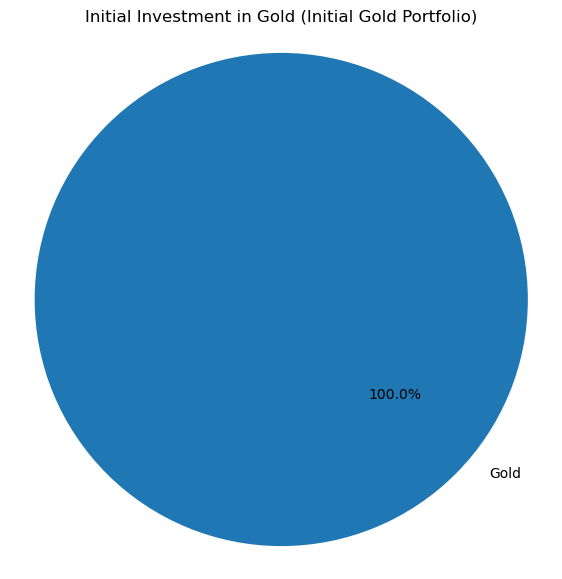

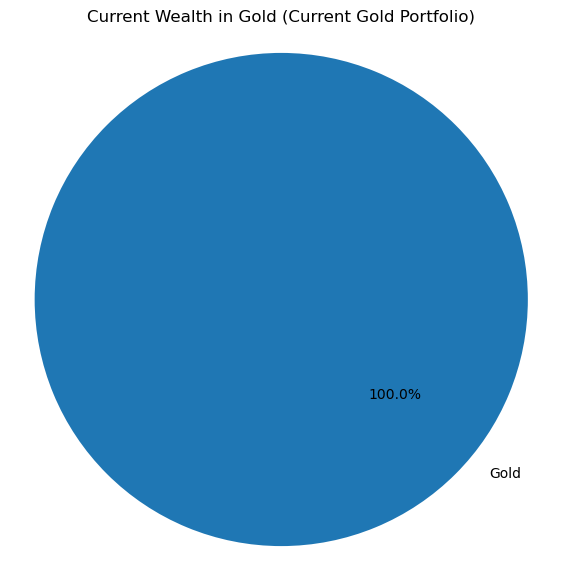


=== Gold Portfolio Performance ===
GC=F: 11616.25 USD, +16.16% (+1616.25 USD)

=== Total Gold Portfolio: 11616.25 USD, +16.16% (+1616.25 USD) ===


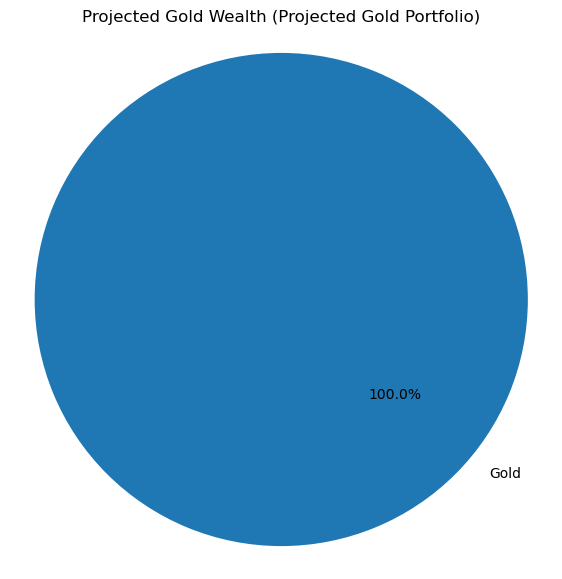

In [50]:
# Main execution starts here
if __name__ == "__main__":
    initial_gold_portfolio = enter_gold_asset()
    current_gold_portfolio = update_gold_portfolio(initial_gold_portfolio)

    # Visualize initial investment in gold
    visualize_initial_gold_portfolio(initial_gold_portfolio)

    # Visualize current wealth in gold
    visualize_current_gold_portfolio(current_gold_portfolio)

    # Print detailed portfolio performance for gold
    print_gold_portfolio_performance(current_gold_portfolio)

    # Calculate and visualize projected wealth in gold
    projected_gold = projected_gold_portfolio(current_gold_portfolio)
    visualize_projected_gold_portfolio(projected_gold)